# Radial displacement modes of an n=3 Polytrope

Figure 11.3 from Chapter 11 of Stellar Structure & Evolution Pinsonneault & Ryden, Cambridge University Press.

The radial displacements $\Delta_r$, arbitrarily normalized so that $\Delta_r = 1$ at $r_0 = R_\star$, for
the first three modes in an $n=3$ polytrope with $\gamma = 5/3$. Solid line: fundamental mode, dotted line:
first overtone, dashed line: second overtone.  Data are from from Schwarzschild 1941, [ApJ, 94, 245](https://ui.adsabs.harvard.edu/abs/1941ApJ....94..245S).

In [1]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig11_3.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data File

ASCII table in 4 columns derived from Schwarzschild (1941).  Columns are radius, fundamental, 1st overtone, and 2nd overtone.

In [3]:
dataFile = 'Schwarzschild_1941.txt'

data = pd.read_csv(dataFile,sep=r'\s+')

r0R = np.array(data['r0R'])
fund = np.array(data['Delr_f'])
over1 = np.array(data['Delr_1'])
over2 = np.array(data['Delr_2'])

# data limits

minR = 0.0 # normalized radius
maxR = 1.0

minDR = -0.05
maxDR = 0.25

## Make the plot

Plot the fundamental mode as a solid black line, 1st overtone as a dotted scarlet line, and the 2nd overtone as a dashed blue line.

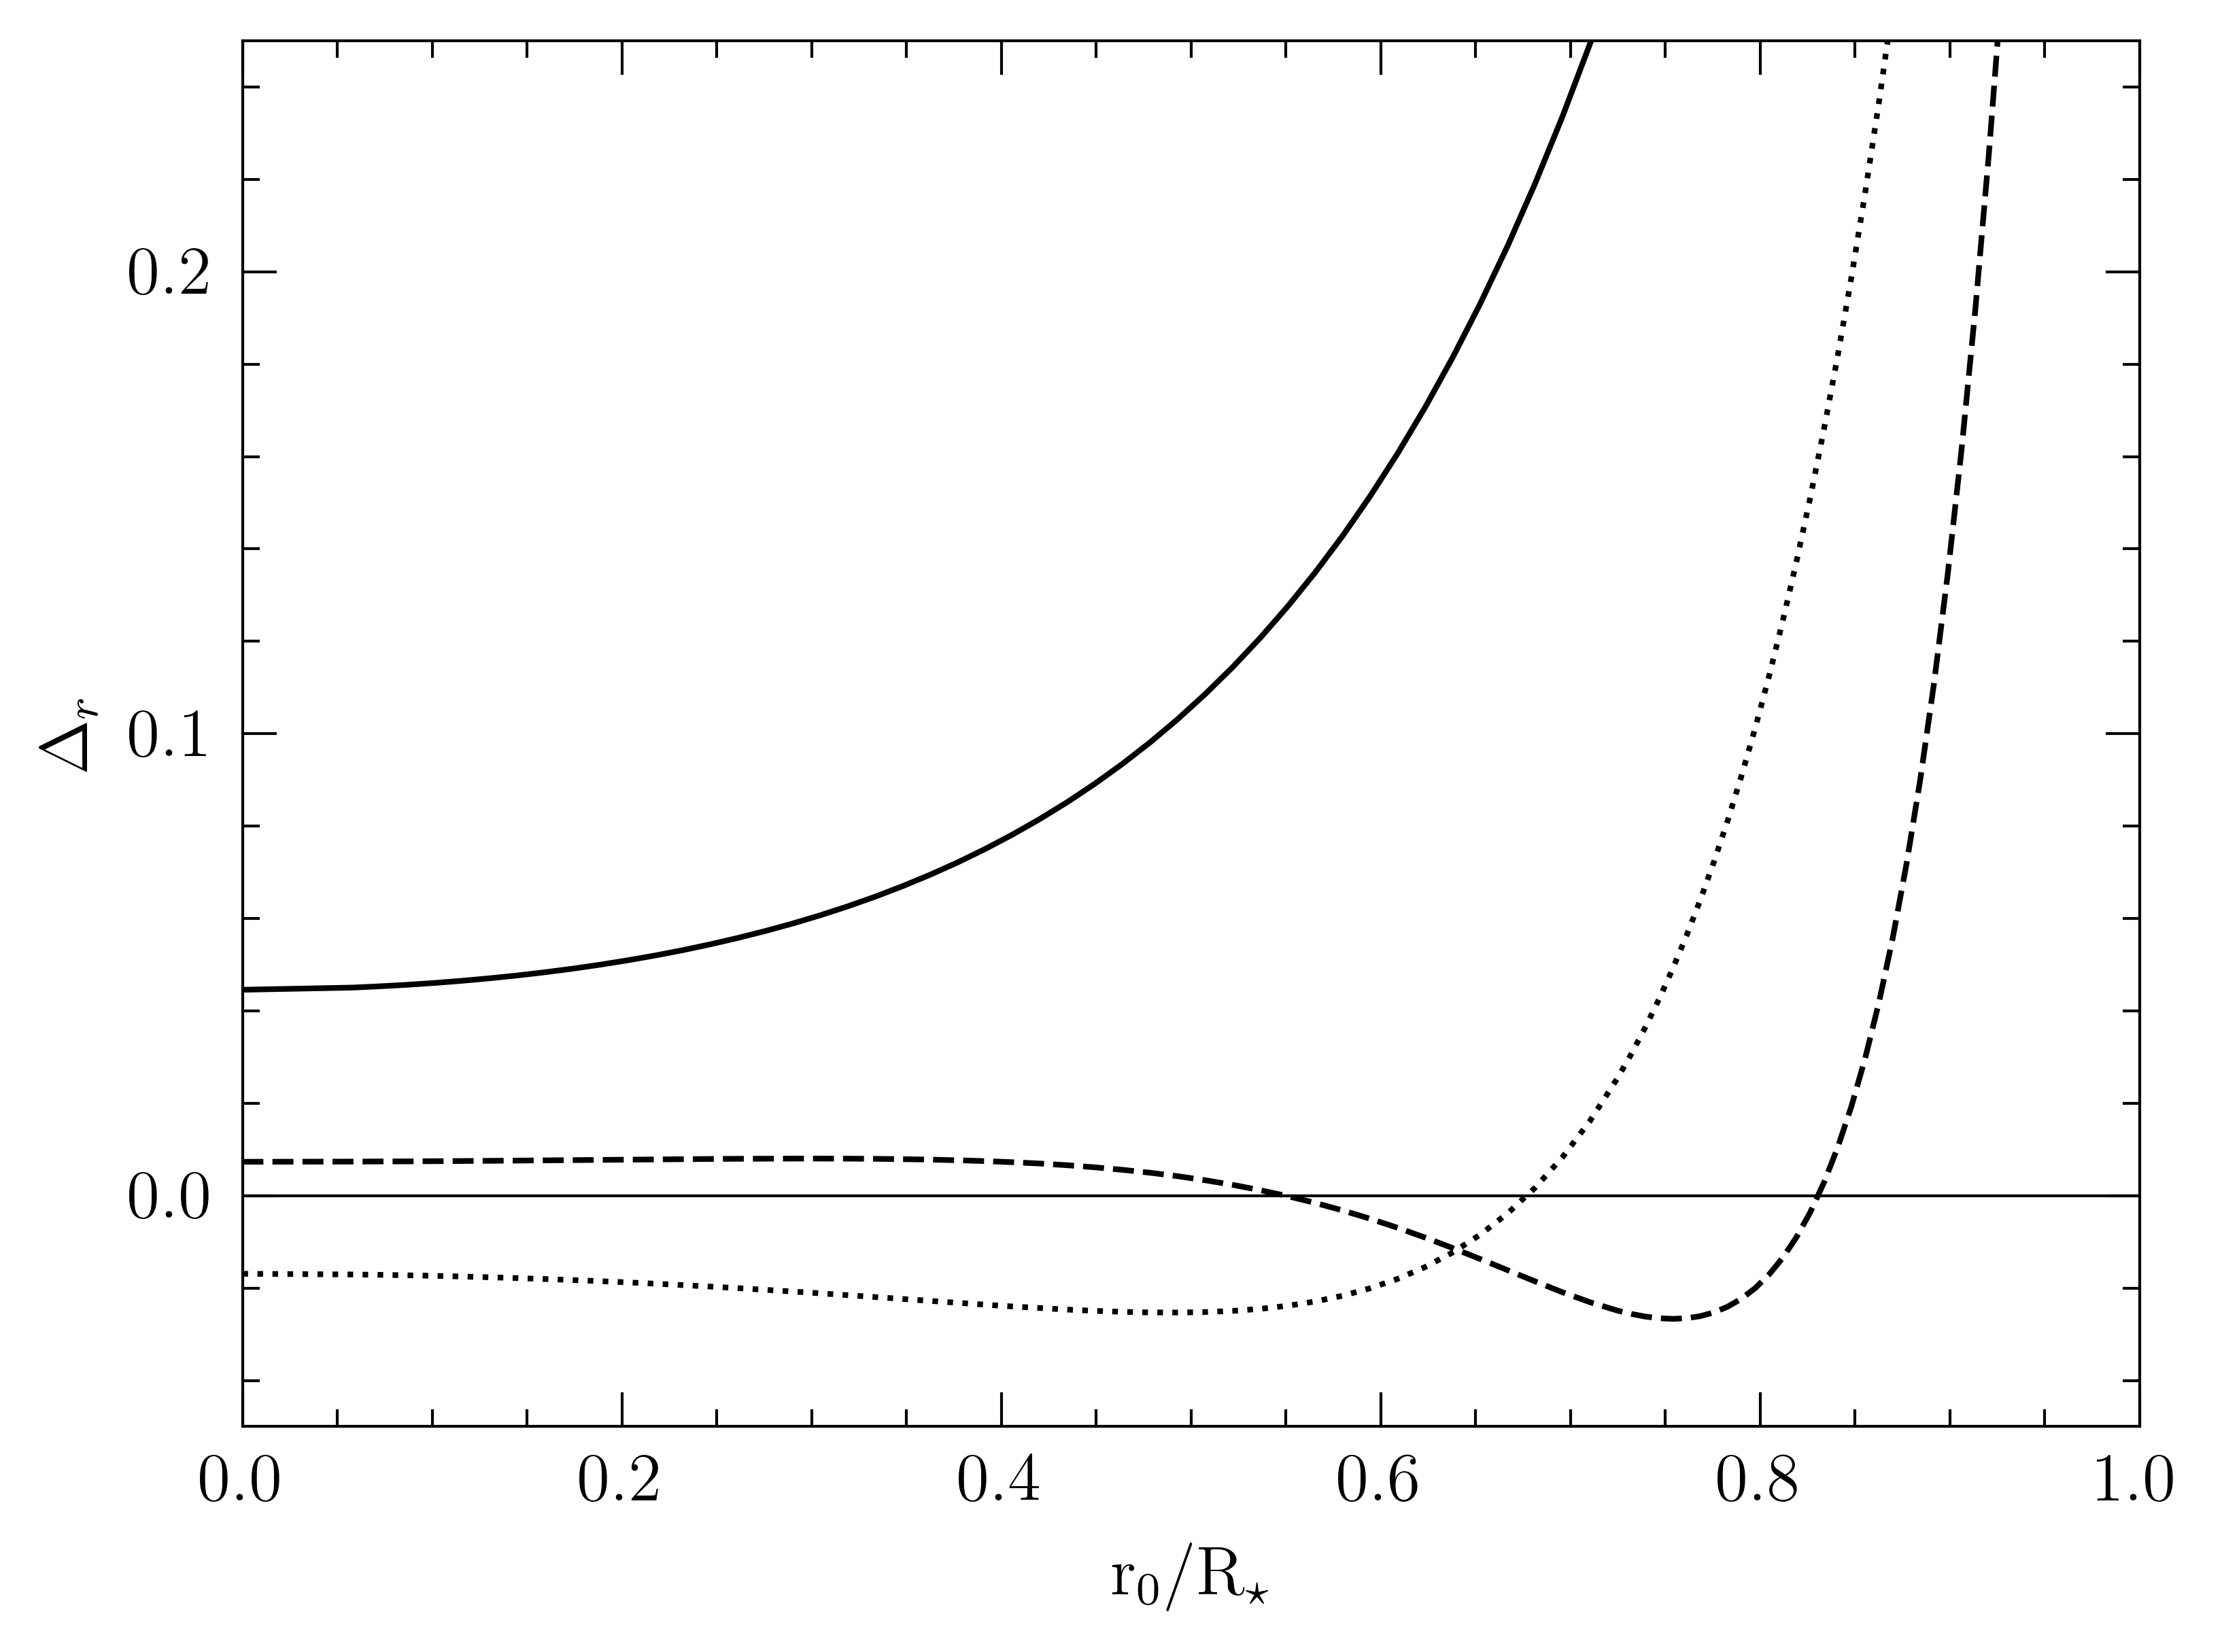

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(minR,maxR)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_xlabel(r'r$_0$/R$_\star$',fontsize=axisFontSize)

ax.set_ylim(minDR,maxDR)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.02))
ax.set_ylabel(r'$\Delta_r$',fontsize=axisFontSize)

plt.plot(r0R,fund,'-',color='black',lw=1,zorder=10)
plt.plot(r0R,over1,':',color='black',lw=1,zorder=10)
plt.plot(r0R,over2,'--',color='black',lw=1,zorder=10)

# Show line of Delta_r = 0

plt.hlines(0.0,1.0,0.0,ls=['-'],color=['black'],lw=0.5,zorder=8)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')